In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [7]:
### SOLUTION
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))
### TEMPLATE
### END SOLUTION

def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    ### SOLUTION
    e = y - tx.dot(w)
    return calculate_mse(e)
    ### TEMPLATE
    # # ***************************************************
    # # INSERT YOUR CODE HERE
    # # TODO: compute loss by MSE
    # # ***************************************************
    # raise NotImplementedError
    ### END SOLUTION

# 2. Grid Search

Fill in the function `grid_search()` below:

In [8]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    ### SOLUTION
    # compute loss for each combinationof w0 and w1.
    for ind_row, row in enumerate(grid_w0):
        for ind_col, col in enumerate(grid_w1):
            w = np.array([row, col])
            losses[ind_row, ind_col] = compute_loss(y, tx, w)
    ### TEMPLATE
    # # ***************************************************
    # # INSERT YOUR CODE HERE
    # # TODO: compute loss for each combination of w0 and w1.
    # # ***************************************************
    # raise NotImplementedError
    ### END SOLUTION
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.032 seconds


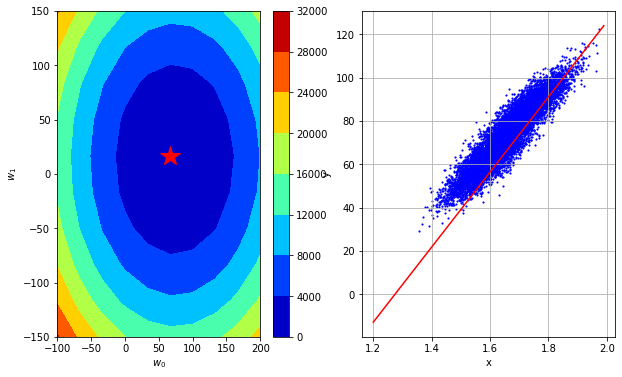

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    ### SOLUTION
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err
    
    ### TEMPLATE
    # # ***************************************************
    # # INSERT YOUR CODE HERE
    # # TODO: compute gradient vector
    # # ***************************************************
    # raise NotImplementedError
    ### END SOLUTION

Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        ### SOLUTION
        # compute loss, gradient
        grad, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        # update w by gradient descent
        w = w - gamma * grad
        
        ### TEMPLATE
        # # ***************************************************
        # # INSERT YOUR CODE HERE
        # # TODO: compute gradient and loss
        # # ***************************************************
        # raise NotImplementedError
        # # ***************************************************
        # # INSERT YOUR CODE HERE
        # # TODO: update w by gradient
        # # ***************************************************
        # raise NotImplementedError
        ### END SOLUTION
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [106]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591674, w0=51.30574540147368, w1=9.435798704492347
GD iter. 1/49: loss=265.3024621089587, w0=66.69746902191575, w1=12.266538315840018
GD iter. 2/49: loss=37.87837955044096, w0=71.31498610804836, w1=13.115760199244335
GD iter. 3/49: loss=17.41021212017444, w0=72.70024123388815, w1=13.370526764265632
GD iter. 4/49: loss=15.568077051450448, w0=73.11581777164008, w1=13.446956733772025
GD iter. 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
GD iter. 10/49: loss=15.3858879656522, w0=73.29379216412117, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305071, w1=13.479705271317192
GD 

In [108]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [109]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    ### SOLUTION
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

    ### TEMPLATE
    # # ***************************************************
    # # INSERT YOUR CODE HERE
    # # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # # ***************************************************
    # raise NotImplementedError
    ### END SOLUTION


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        ### SOLUTION
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
            
        ### TEMPLATE
        # # ***************************************************
        # # INSERT YOUR CODE HERE
        # # TODO: implement stochastic gradient descent.
        # # ***************************************************
        # raise NotImplementedError
        ### END SOLUTION

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [111]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2382.1923426902736, w0=5.98196950413687, w1=-0.7580528585584875
SGD iter. 1/49: loss=1828.7350117433746, w0=13.739118465918366, w1=4.53971111981686
SGD iter. 2/49: loss=1496.9744642972573, w0=19.3167026262254, w1=6.434363522053372
SGD iter. 3/49: loss=1178.256706922229, w0=26.728591637717983, w1=26.026092238034884
SGD iter. 4/49: loss=841.0833424876338, w0=32.852558758353126, w1=17.466070199227975
SGD iter. 5/49: loss=749.2796639205893, w0=35.70133767335279, w1=20.867889178215954
SGD iter. 6/49: loss=531.1771118178656, w0=41.313595535962556, w1=10.506302436853984
SGD iter. 7/49: loss=431.81303085429835, w0=44.498651112565135, w1=15.399780238204546
SGD iter. 8/49: loss=374.2549705624242, w0=47.24183339098254, w1=19.726859334606736
SGD iter. 9/49: loss=267.3111877880608, w0=50.96131964562683, w1=15.739241550951029
SGD iter. 10/49: loss=230.07062390443002, w0=52.59208757137665, w1=14.376107032197044
SGD iter. 11/49: loss=191.75397296072055, w0=54.654633551284114, w1=1

In [113]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [114]:
import datetime
from helpers import *

### SOLUTION
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
### TEMPLATE
## ***************************************************
## INSERT YOUR CODE HERE
## TODO: reload the data by subsampling first, then by subsampling and adding outliers
## ***************************************************
#raise NotImplementedError
### END SOLUTION

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [115]:
y.shape, tx.shape

((202,), (202, 2))

In [116]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

### SOLUTION
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
### TEMPLATE
# # ***************************************************
# # INSERT YOUR CODE HERE
# # TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
# #       and the model fit
# # ***************************************************
# raise NotImplementedError
### END SOLUTION


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=318.282124701595, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=88.6423556165126, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=67.97477639885521, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225756, w1=11.034889001593537
GD iter

In [118]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [119]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    ### SOLUTION
    err = y - tx.dot(w)
    grad = -np.dot(tx.T,np.sign(err)) / len(err)
    return grad, err
    ### TEMPLATE
    # # ***************************************************
    # # INSERT YOUR CODE HERE
    # # TODO: compute subgradient gradient vector for MAE
    # # ***************************************************
    # raise NotImplementedError
    ### END SOLUTION

In [120]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        ### SOLUTION
        # compute loss, gradient
        grad, err = compute_subgradient_mae(y, tx, w)
        loss = calculate_mae(err)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        
        ### TEMPLATE
        # # ***************************************************
        # # INSERT YOUR CODE HERE
        # # TODO: compute subgradient and loss
        # # ***************************************************
        # raise NotImplementedError
        # # ***************************************************
        # # INSERT YOUR CODE HERE
        # # TODO: update w by subgradient
        # # ***************************************************
        # raise NotImplementedError
        ### END SOLUTION
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [121]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=8.756471895211877e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.7512943790423754e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=2.626941568563563e-15
SubGD iter. 3/499: loss=71.96780585492637, w0=2.8, w1=3.502588758084751e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=4.378235947605939e-15
SubGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=5.253883137127127e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=6.1295303266483146e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=7.0051775161695025e-15
SubGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=7.88082470569069e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=8.756471895211878e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=9.632119084733065e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=1.0507766274254253e-14
SubGD iter.

In [123]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [124]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        ### SOLUTION
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic subgradient and loss
            grad, err = compute_subgradient_mae(y_batch, tx_batch, w)
            # update w through the stochastic subgradient update
            w = w - gamma * grad
            # calculate loss
            loss = calculate_mae(err)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        ### TEMPLATE
        # # ***************************************************
        # # INSERT YOUR CODE HERE
        # # TODO: implement stochastic subgradient descent.
        # # ***************************************************
        # raise NotImplementedError
        ### END SOLUTION
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [125]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=113.47561257055952, w0=0.7, w1=1.239316300978001
SubSGD iter. 1/499: loss=86.90328827780351, w0=1.4, w1=1.4836290246871353
SubSGD iter. 2/499: loss=72.91204801413195, w0=2.0999999999999996, w1=1.4596631848840445
SubSGD iter. 3/499: loss=47.775558408903585, w0=2.8, w1=0.7790640072279618
SubSGD iter. 4/499: loss=66.59107058192123, w0=3.5, w1=0.25443108251622226
SubSGD iter. 5/499: loss=57.8916499072674, w0=4.2, w1=-0.02811673657000291
SubSGD iter. 6/499: loss=80.14237651298956, w0=4.9, w1=0.4999390789406458
SubSGD iter. 7/499: loss=50.66140782945712, w0=5.6000000000000005, w1=-0.008562038799187599
SubSGD iter. 8/499: loss=83.87658020169829, w0=6.300000000000001, w1=0.5156185126525306
SubSGD iter. 9/499: loss=52.36411899371199, w0=7.000000000000001, w1=-0.011338523116317334
SubSGD iter. 10/499: loss=86.76081304462494, w0=7.700000000000001, w1=0.6016539740672424
SubSGD iter. 11/499: loss=81.73151045025607, w0=8.4, w1=1.233928402548933
SubSGD iter. 12/499: loss=48.4

In [126]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>